Thank you for opening this script!

I have made all efforts to document each and every step involved in the prediction process so that this notebook acts as a good starting point for new Kagglers and new machine learning enthusiasts.

Please **upvote** this kernel so that it reaches the top of the chart and is easily locatable by new users. Your comments on how we can improve this kernel is welcome. Thanks.

My other exploratory studies can be accessed here :
https://www.kaggle.com/sharmasanthosh/kernels
***
## Layout of the document
The prediction process is divided into two notebooks.

This notebook : Covers data statistics, data visualization, and feature selection

Part 2 : Covers prediction using various algorithms : https://www.kaggle.com/sharmasanthosh/forest-cover-type-prediction/exploratory-study-of-ml-algorithms
***
## Data statistics
* Shape
* Datatypes
* Description
* Skew
* Class distribution

## Data Interaction
* Correlation
* Scatter plot

## Data Visualization
* Box and density plots
* Grouping of one hot encoded attributes

## Data Cleaning
* Remove unnecessary columns

## Data Preparation
* Original
* Delete rows or impute values in case of missing
* StandardScaler
* MinMaxScaler
* Normalizer

## Feature selection
* ExtraTreesClassifier
* GradientBoostingClassifier
* RandomForestClassifier
* XGBClassifier
* RFE
* SelectPercentile
* PCA
* PCA + SelectPercentile
* Feature Engineering

## Evaluation, prediction, and analysis
* LDA (Linear algo)
* LR (Linear algo)
* KNN (Non-linear algo)
* CART (Non-linear algo)
* Naive Bayes (Non-linear algo)
* SVC (Non-linear algo)
* Bagged Decision Trees (Bagging)
* Random Forest (Bagging)
* Extra Trees (Bagging)
* AdaBoost (Boosting)
* Stochastic Gradient Boosting (Boosting)
* Voting Classifier (Voting)
* MLP (Deep Learning)
* XGBoost

***

## Load raw data:

Information about all the attributes can be found here:

https://www.kaggle.com/c/forest-cover-type-prediction/data

Learning: 
We need to predict the 'Cover_Type' based on the other attributes. Hence, this is a classification problem where the target could belong to any of the seven classes.

In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas #provides data structures to quickly analyze data
#Since this code runs on Kaggle server, train data can be accessed directly in the 'input' folder
dataset = pandas.read_csv("train.csv") 

#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]

## Data statistics
* Shape

In [2]:
# Size of the dataframe

print(dataset.shape)
index = dataset.Wilderness_Area1==0
index
# We can see that there are 15120 instances having 55 attributes

#Learning : Data is loaded successfully as dimensions match the data description

(15120, 55)


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15090     True
15091     True
15092     True
15093     True
15094     True
15095     True
15096     True
15097     True
15098     True
15099     True
15100     True
15101     True
15102     True
15103     True
15104     True
15105     True
15106     True
15107     True
15108     True
15109     True
15110     True
15111     True
15112     True
15113     True
15114     True
15115     True
15116     True
15117     True
15118     True
15119     True
Name: Wilderness_Area1, dtype: bool

## Data statistics
* Datatypes

In [3]:
# Datatypes of the attributes

print(dataset.dtypes)

# Learning : Data types of all attributes has been inferred as int64

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

## Data statistics
* Description

In [4]:
# Statistical description

pandas.set_option('display.max_columns', None)
print(dataset.describe())

# Learning :
# No attribute is missing as count is 15120 for all attributes. Hence, all rows can be used
# Negative value(s) present in Vertical_Distance_To_Hydrology. Hence, some tests such as chi-sq cant be used.
# Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis
# Attributes Soil_Type7 and Soil_Type15 can be removed as they are constant
# Scales are not the same for all. Hence, rescaling and standardization may be necessary for some algos

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

## Data statistics
* Skew

In [5]:
# Skewness of the distribution

print(dataset.skew())

# Values close to 0 show less skew
# Several attributes in Soil_Type show a large skew. Hence, some algos may benefit if skew is corrected

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

## Data statistics
* Class distribution

In [6]:
# Number of instances belonging to each class

dataset.groupby('Cover_Type').size()

# We see that all classes have an equal presence. No class re-balancing is necessary

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

## Data Interaction
* Correlation

In [7]:
import numpy

# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=dataset.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


## Data Interaction
* Scatter plot

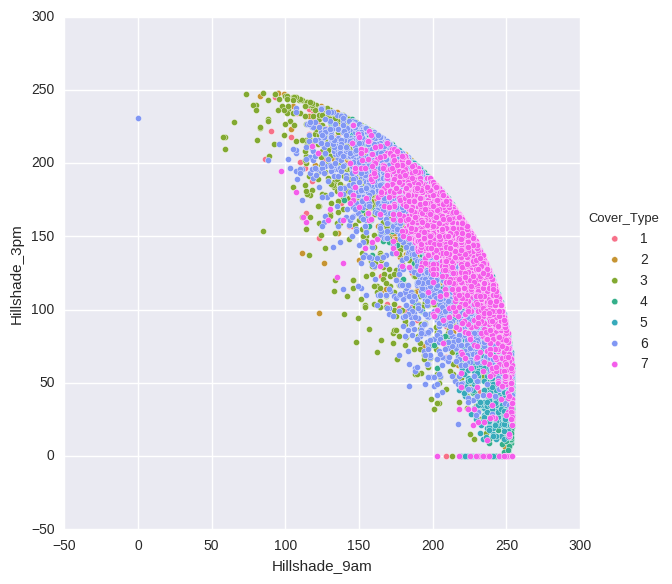

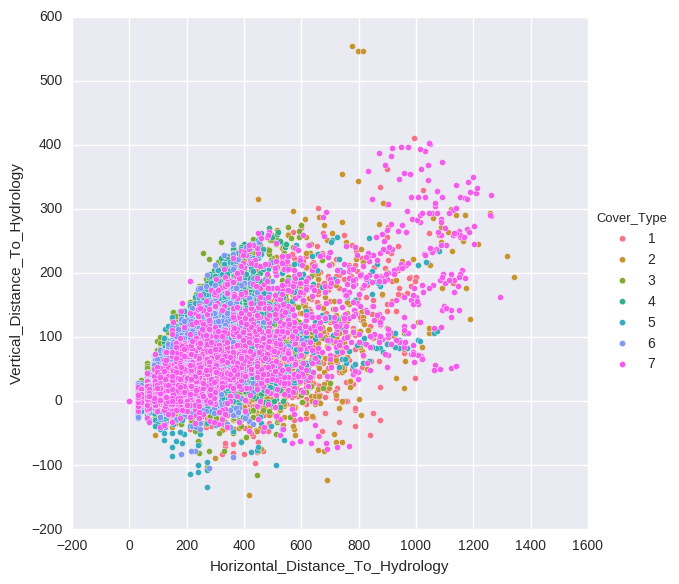

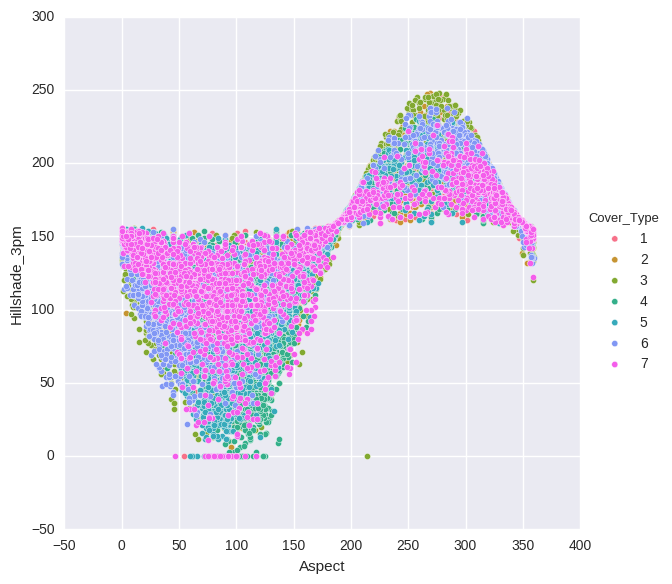

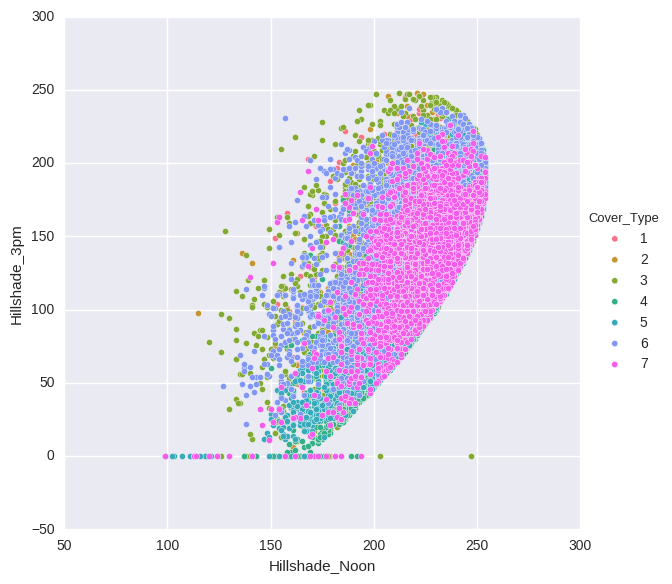

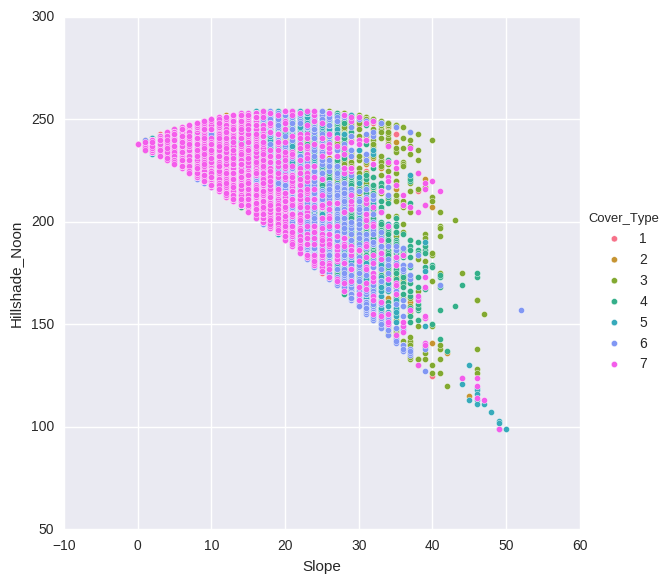

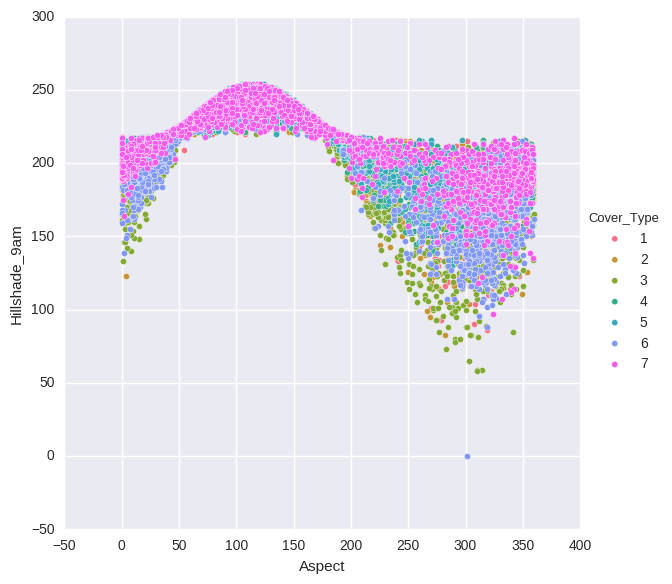

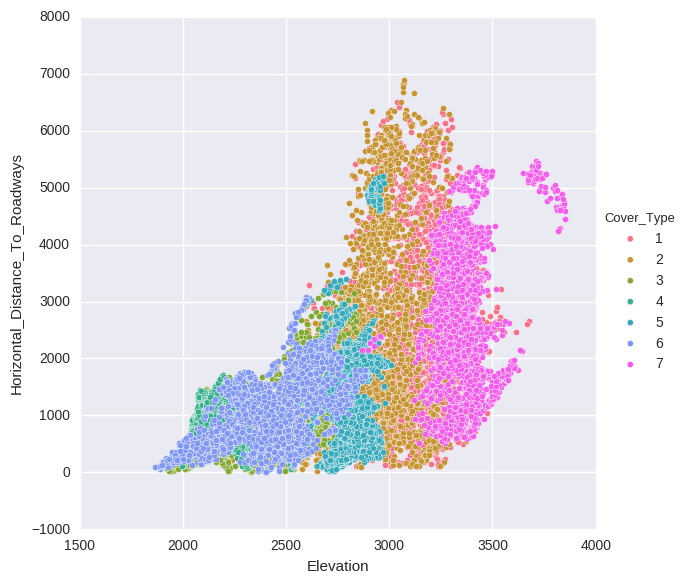

In [8]:
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#The plots show to which class does a point belong to. The class distribution overlaps in the plots.    
#Hillshade patterns give a nice ellipsoid patterns with each other
#Aspect and Hillshades attributes form a sigmoid pattern
#Horizontal and vertical distance to hydrology give an almost linear pattern.

## Data Visualization
* Box and density plots

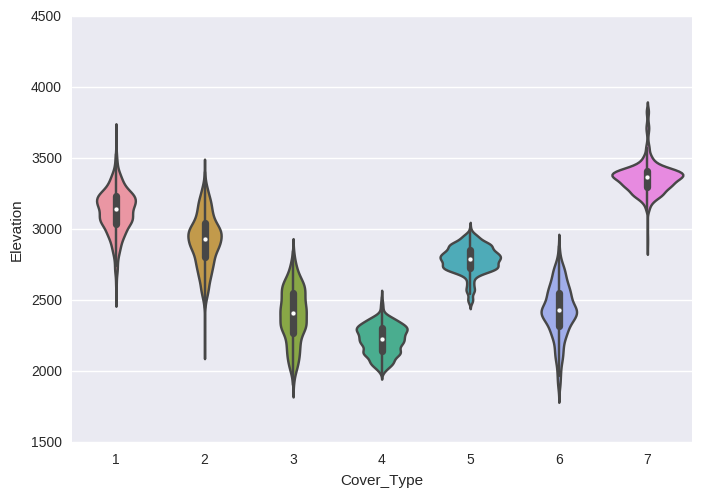

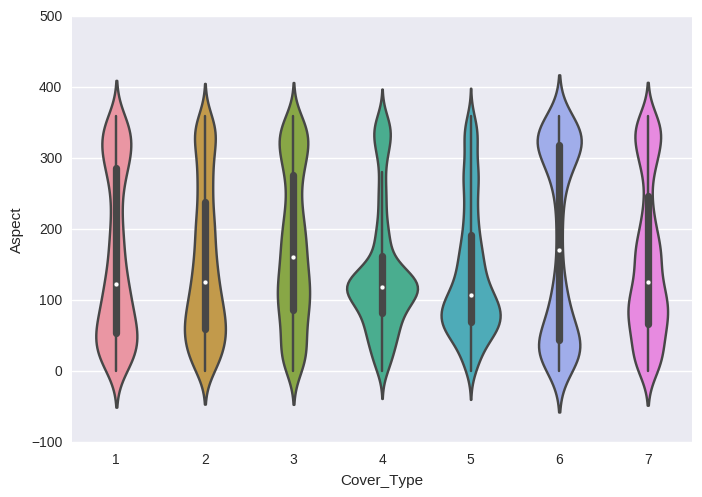

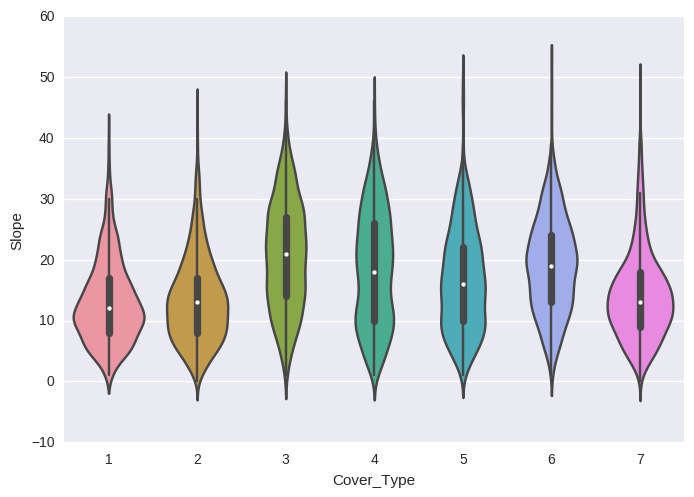

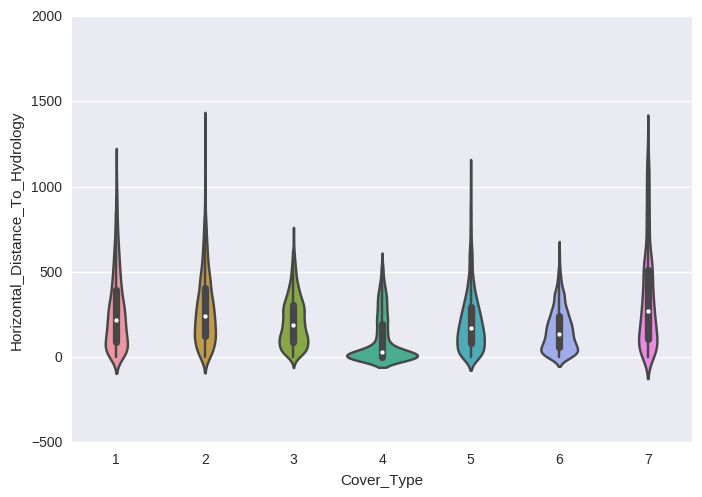

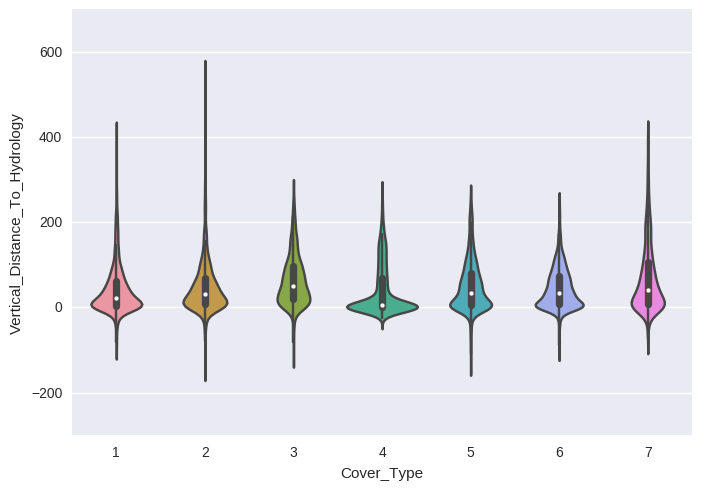

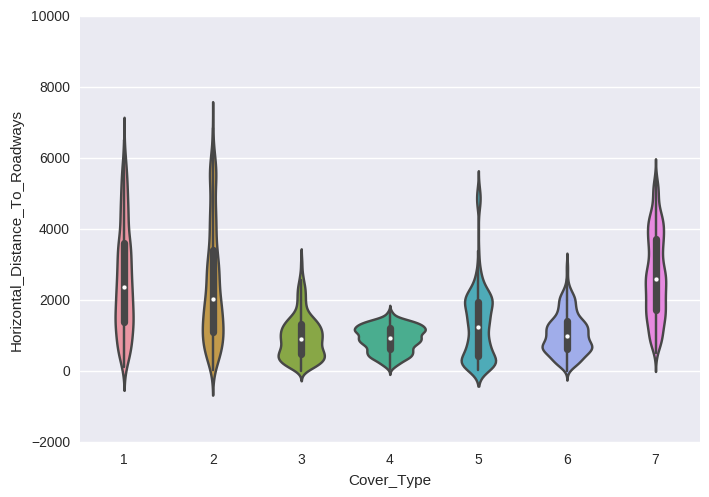

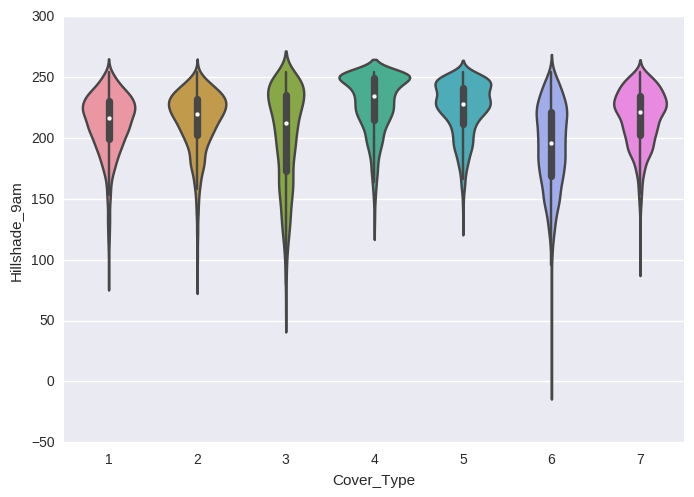

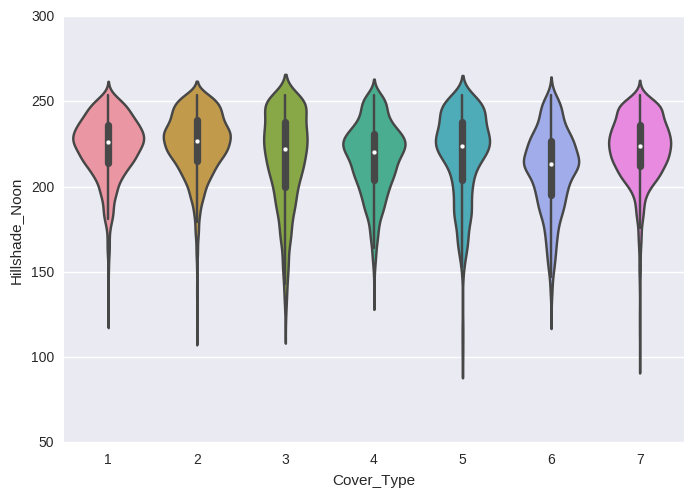

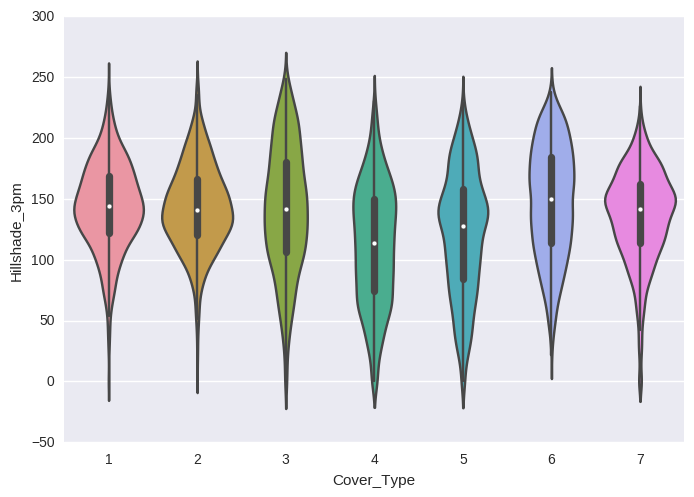

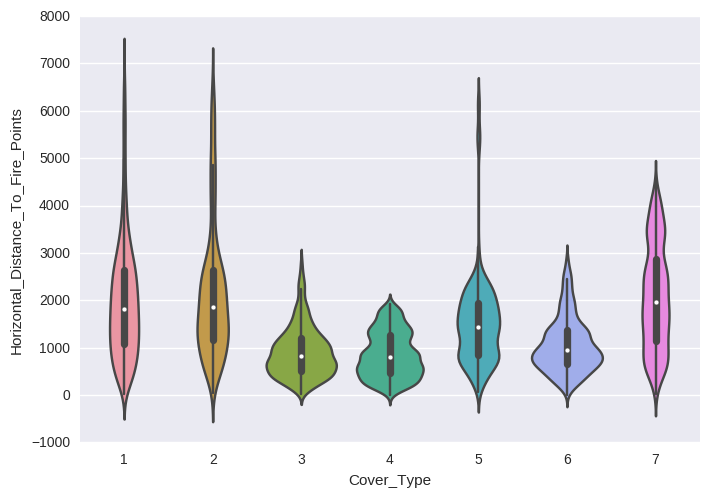

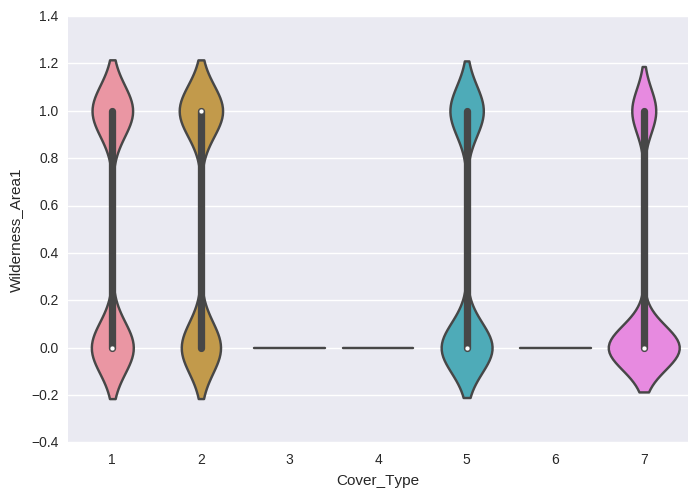

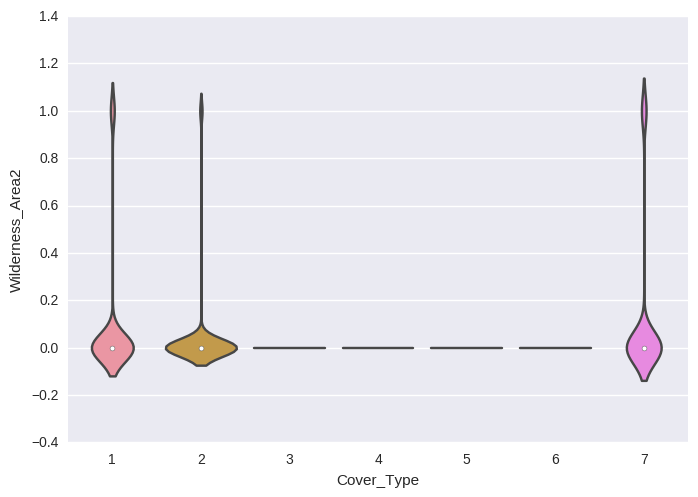

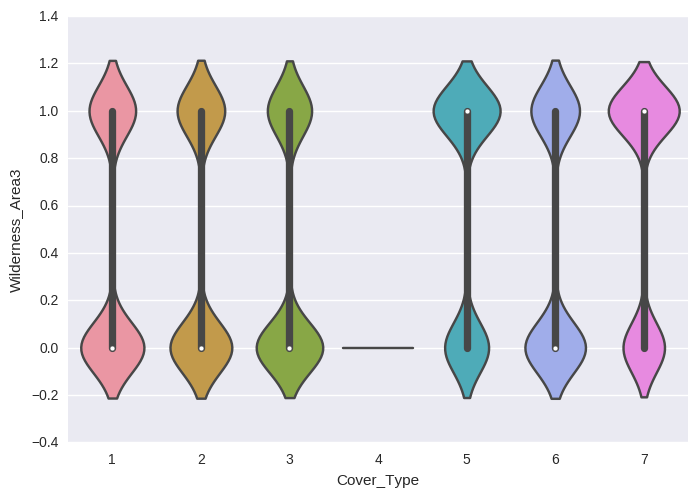

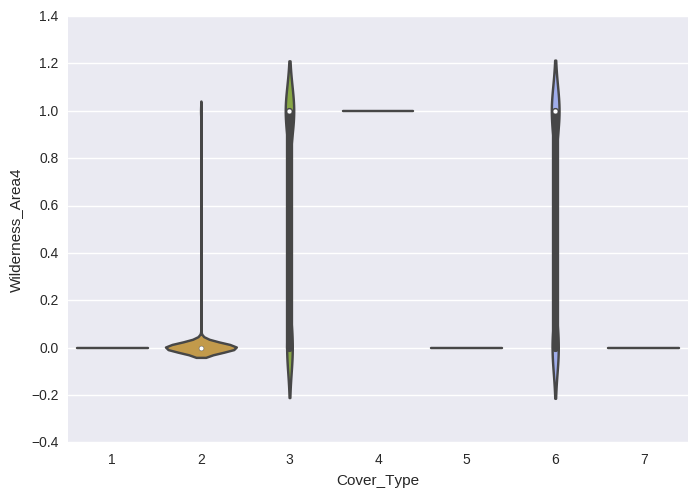

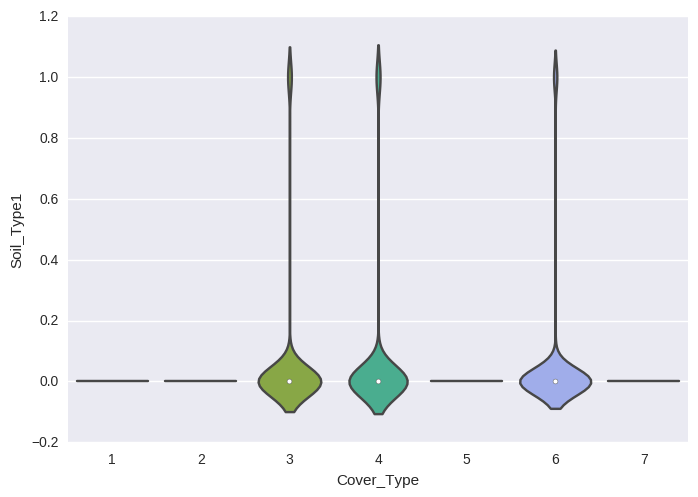

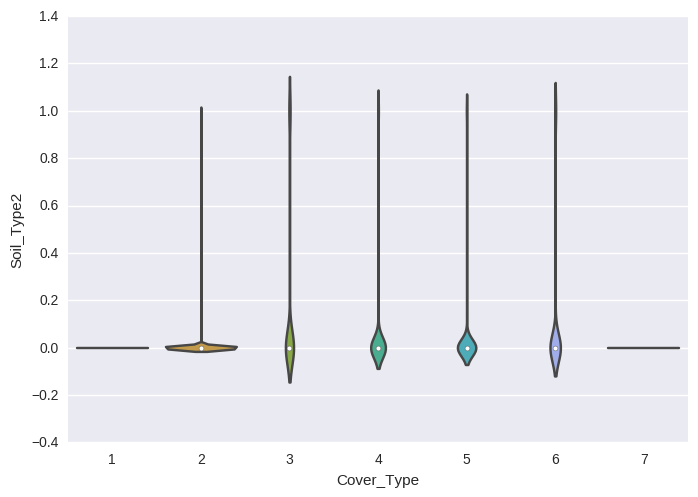

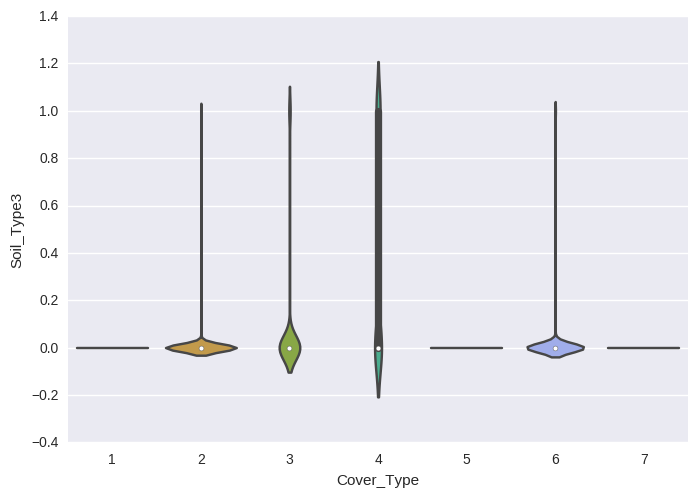

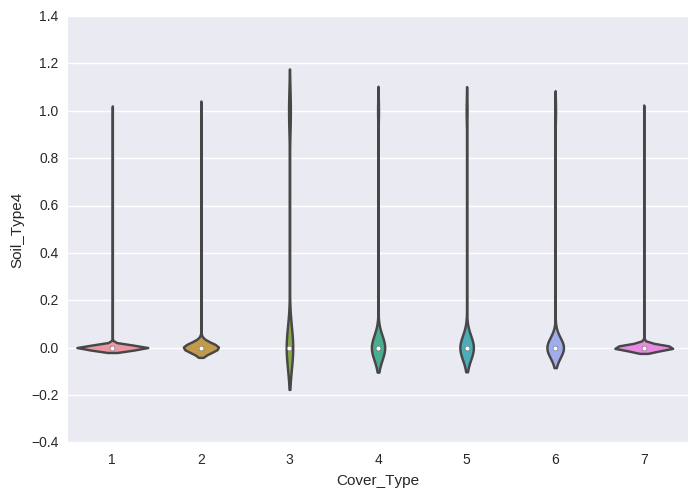

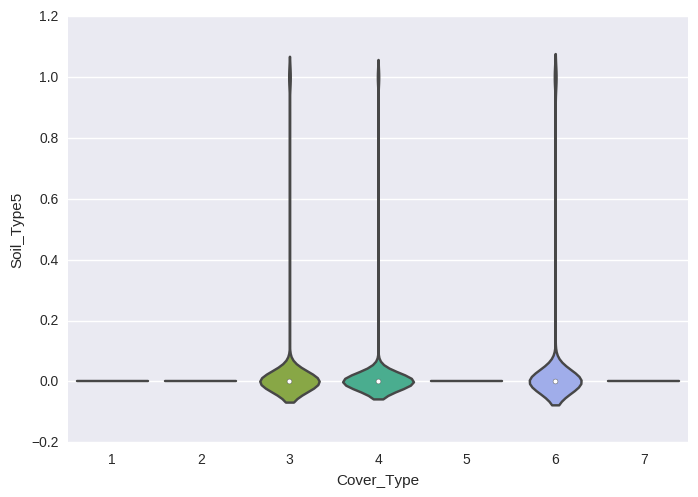

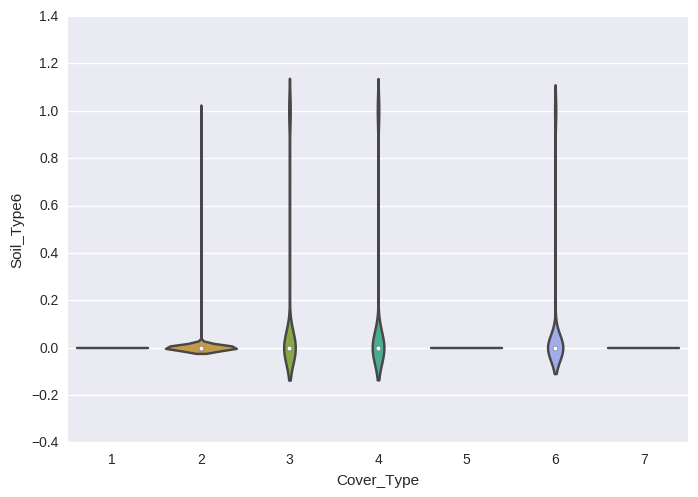

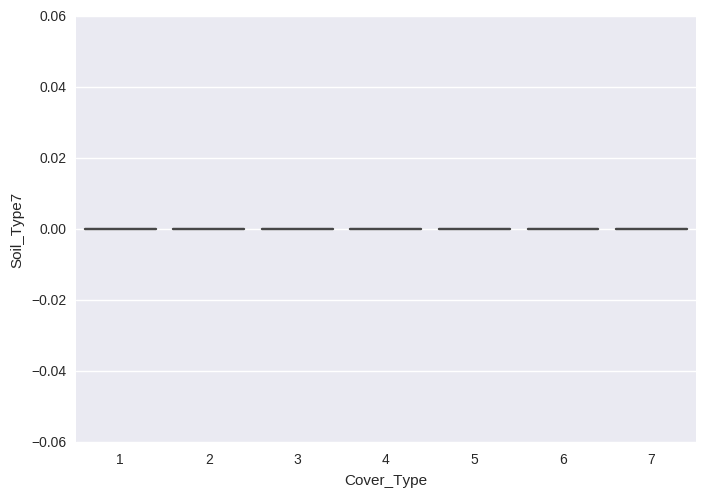

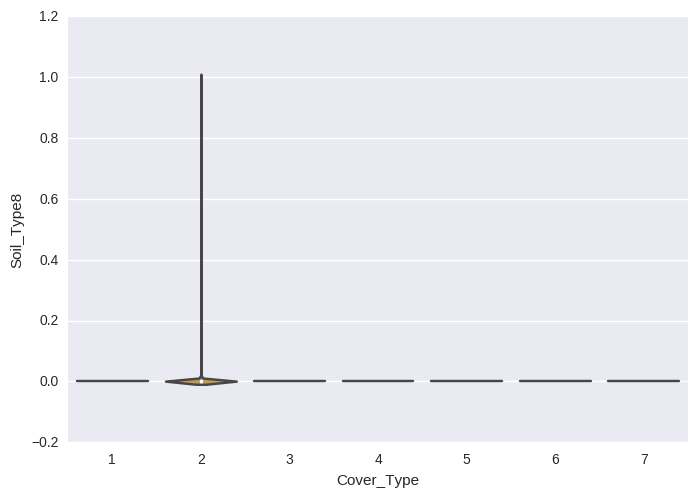

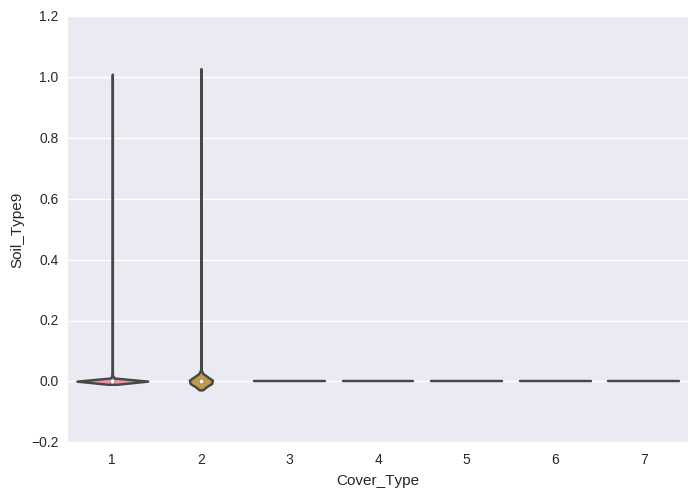

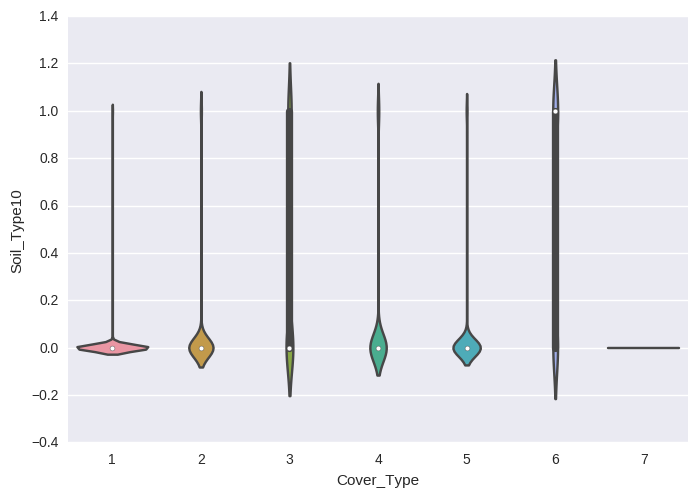

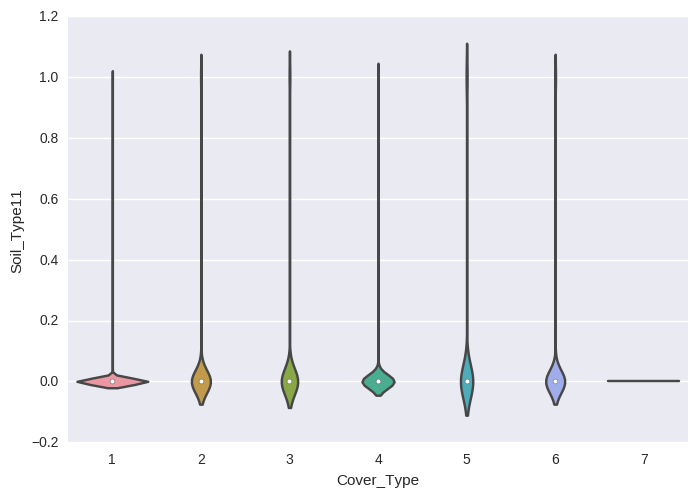

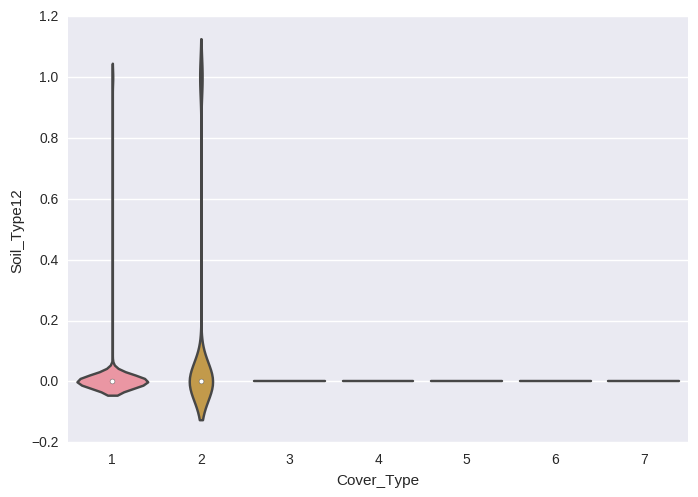

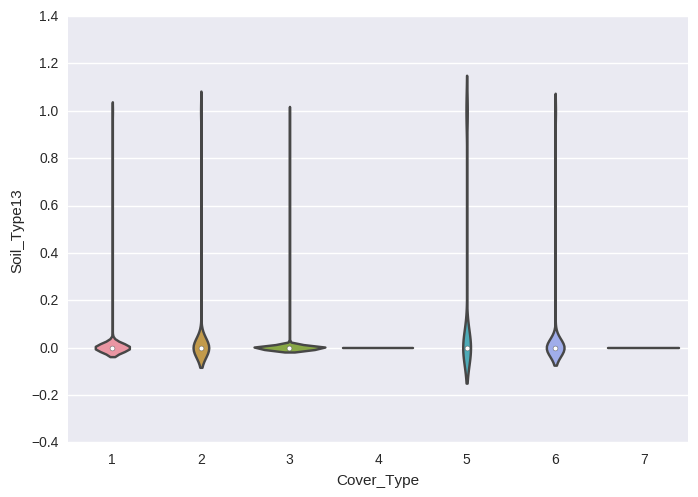

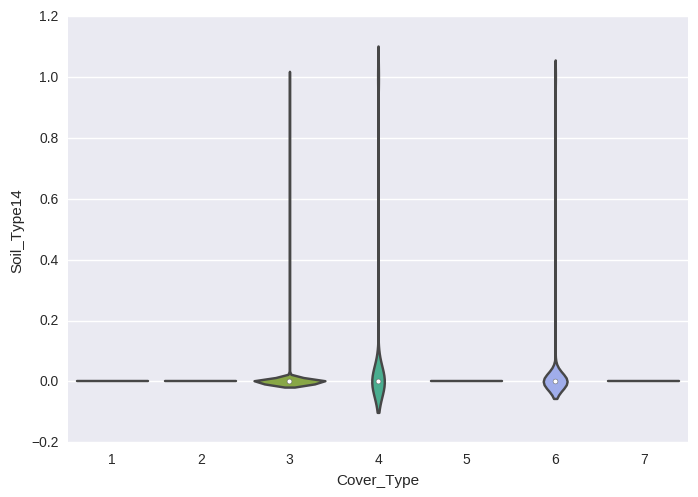

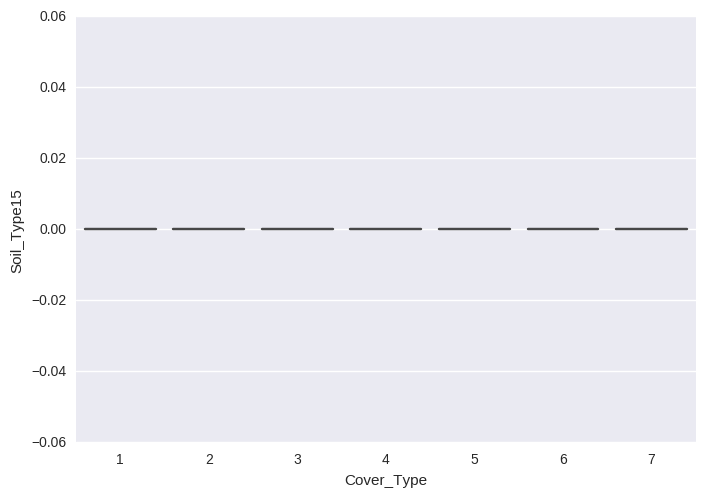

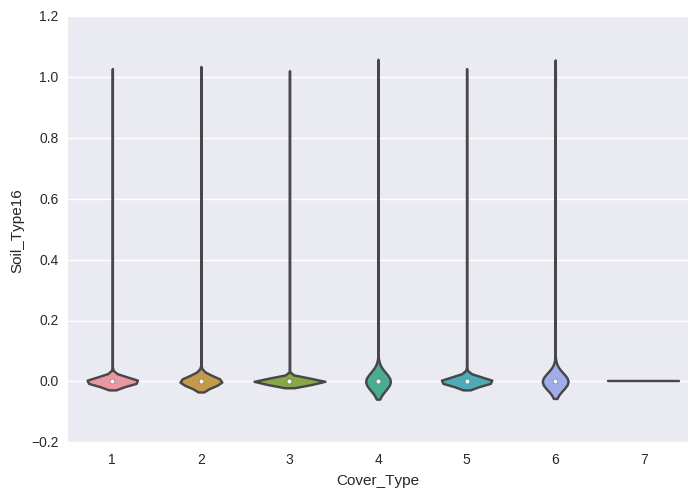

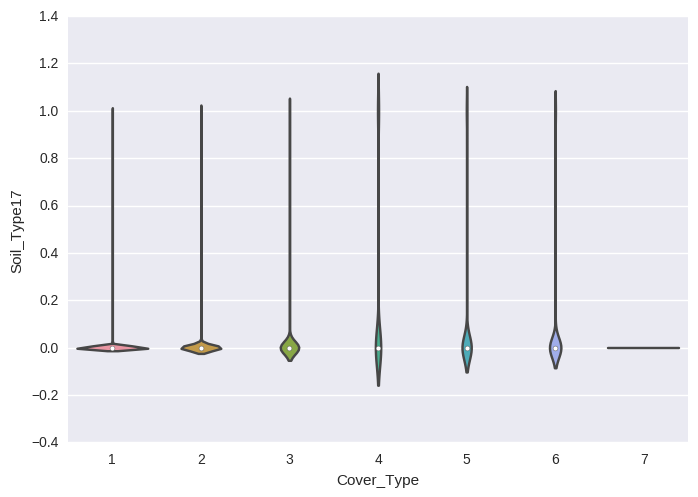

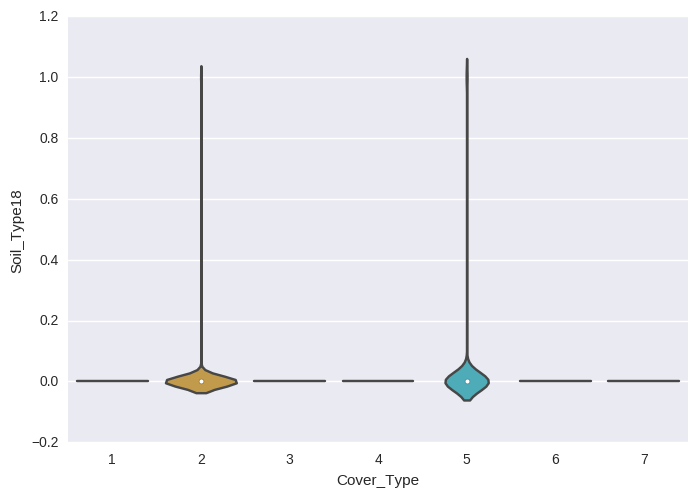

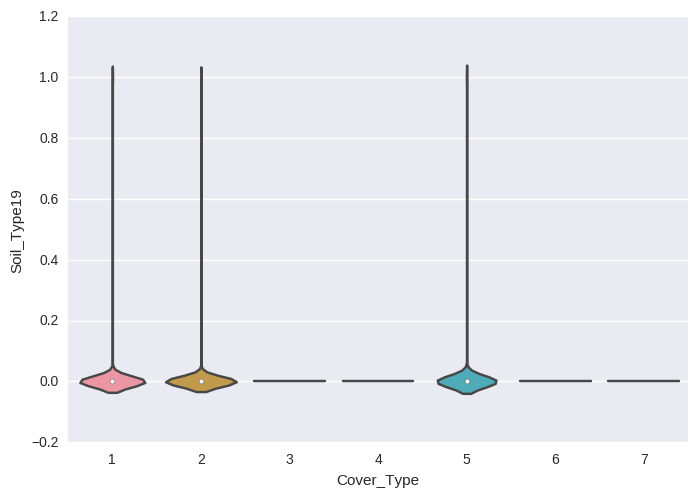

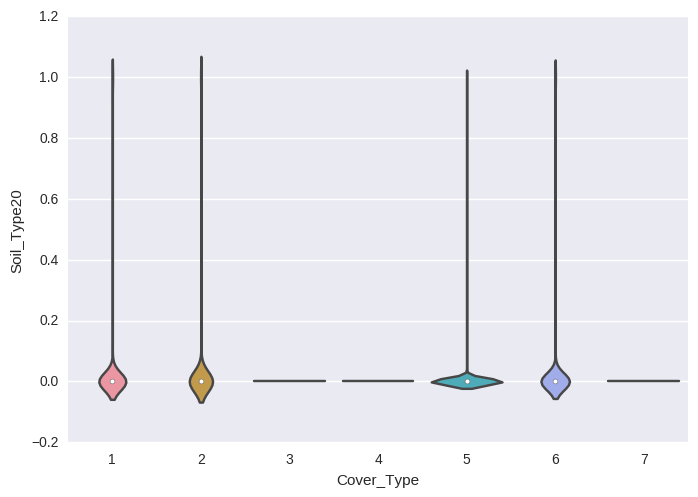

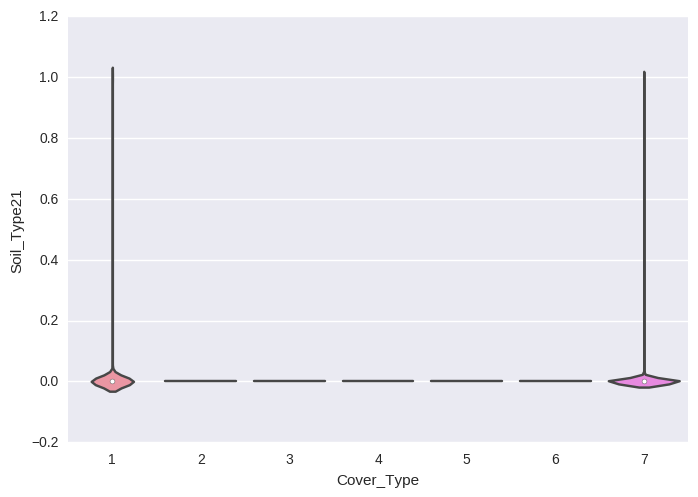

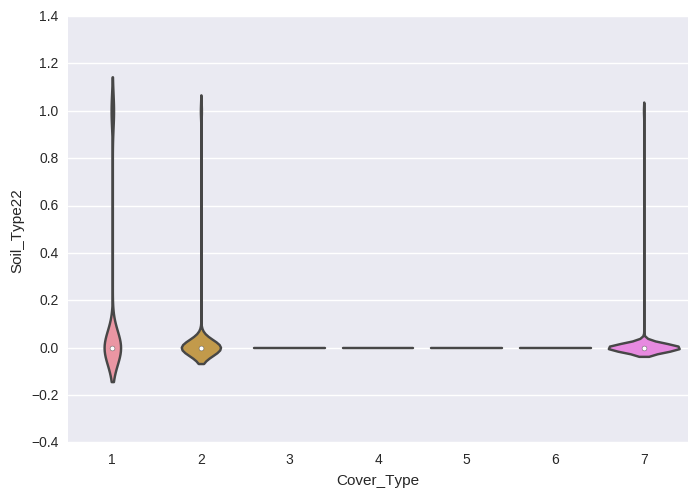

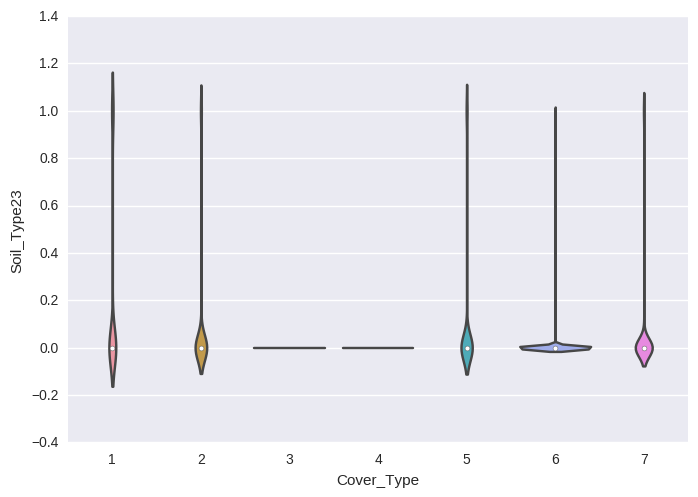

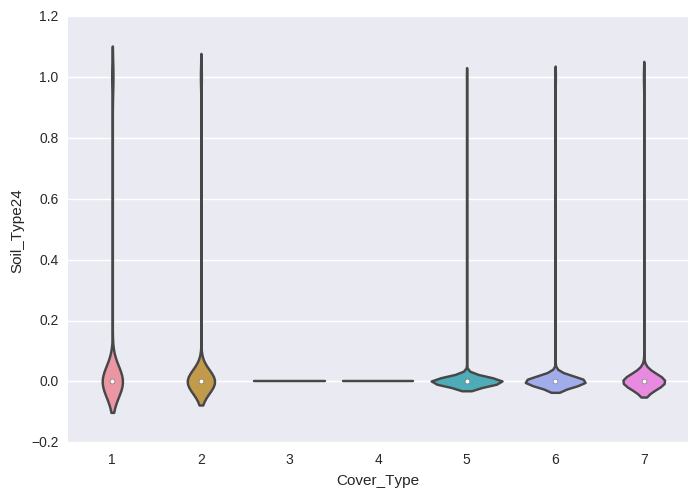

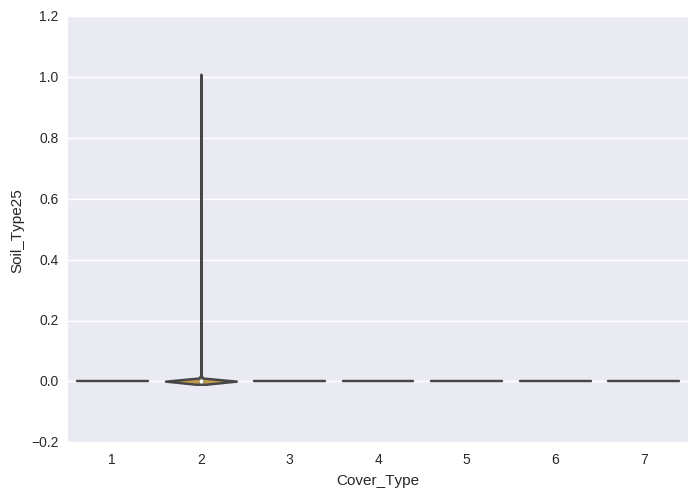

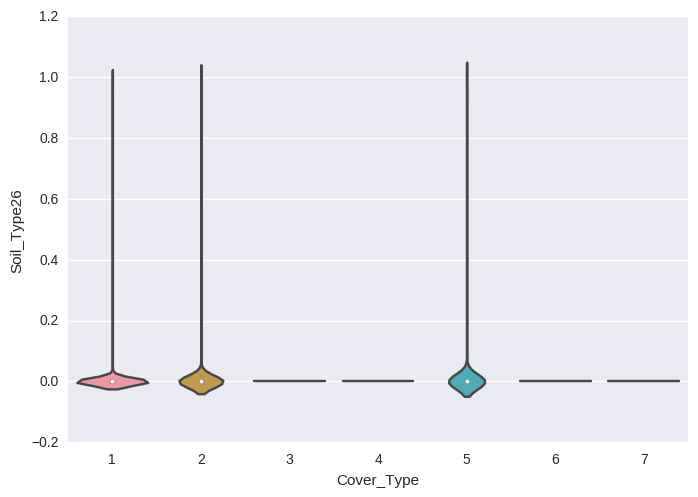

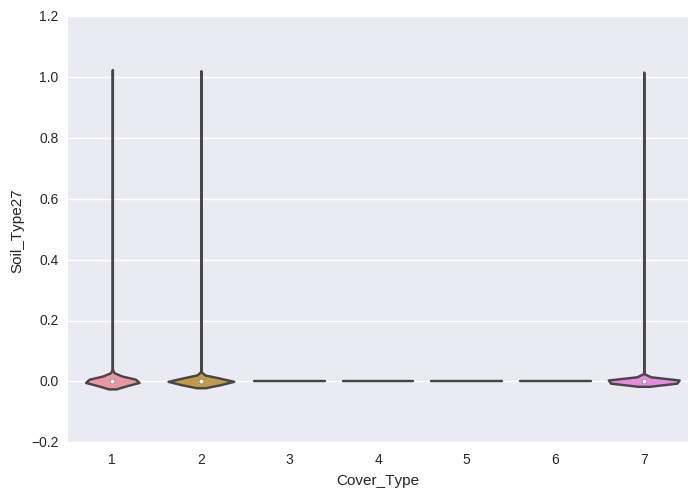

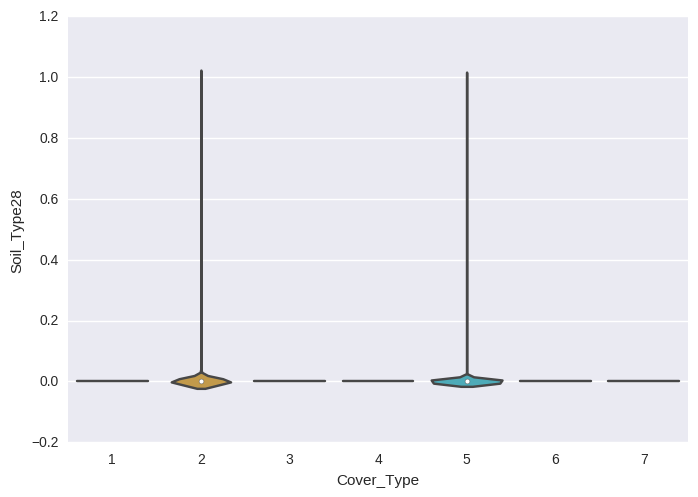

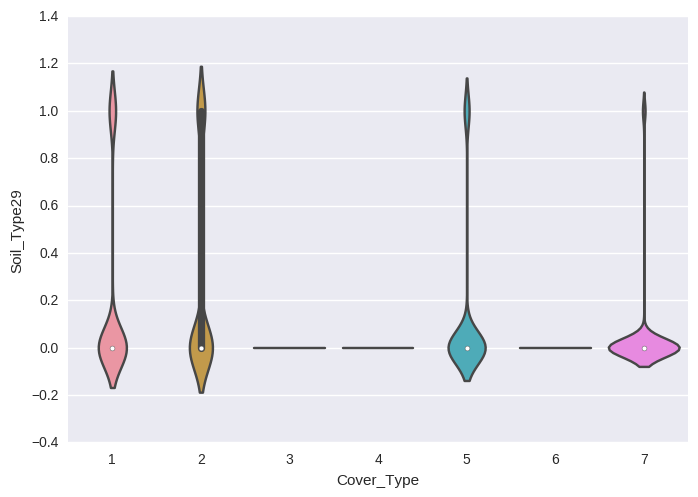

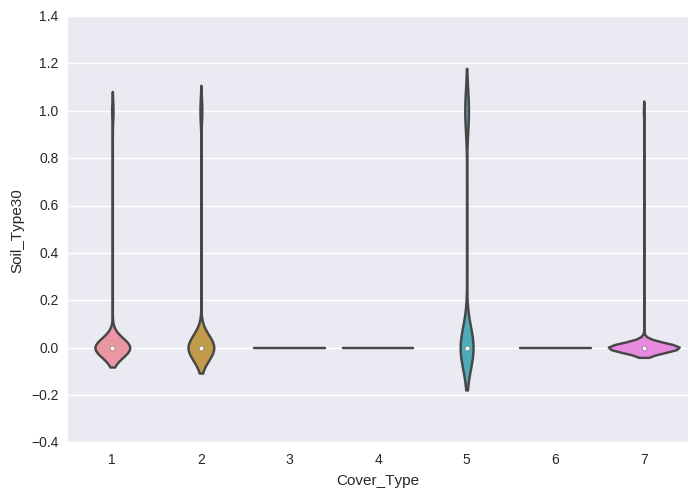

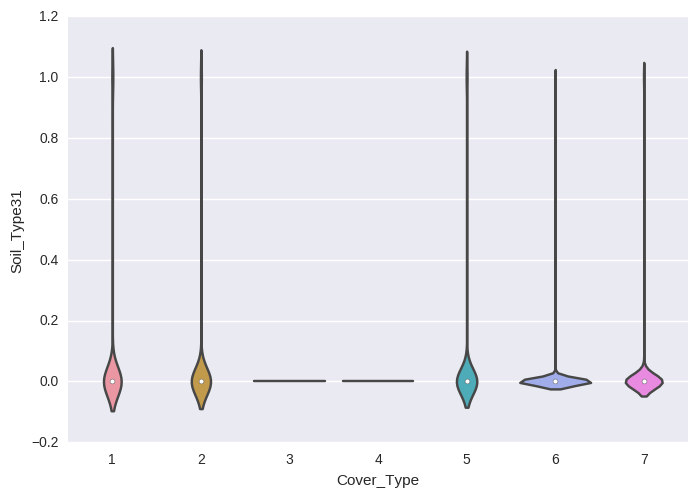

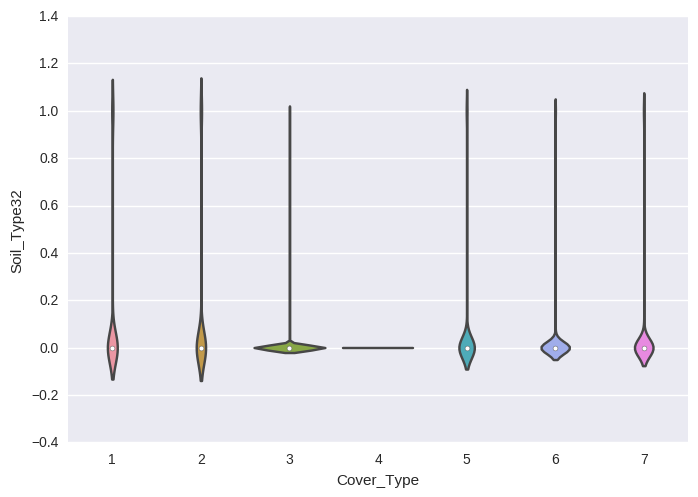

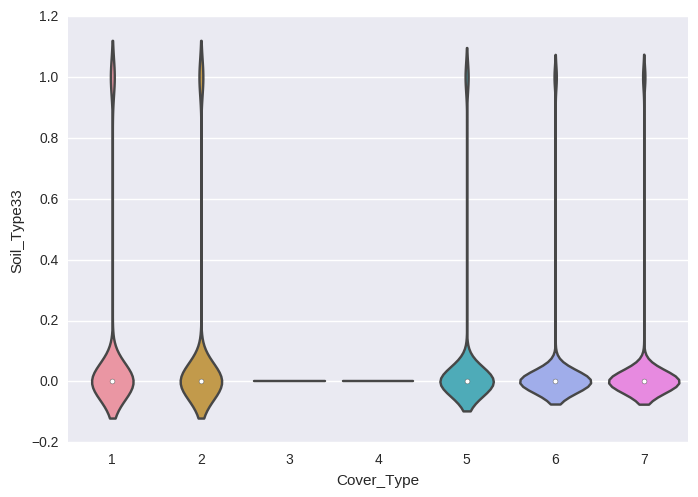

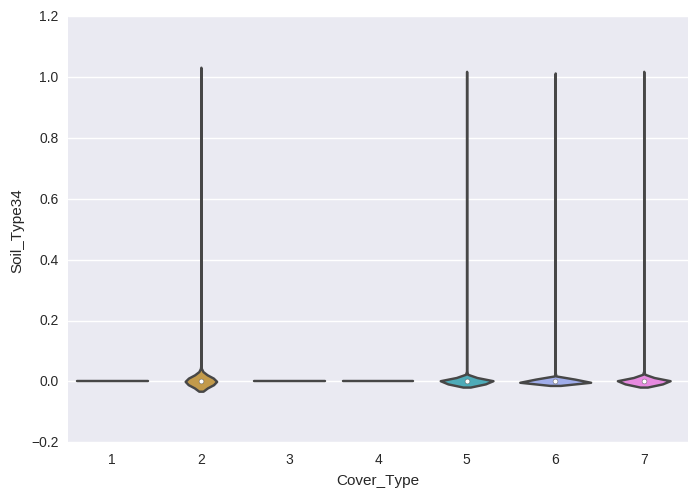

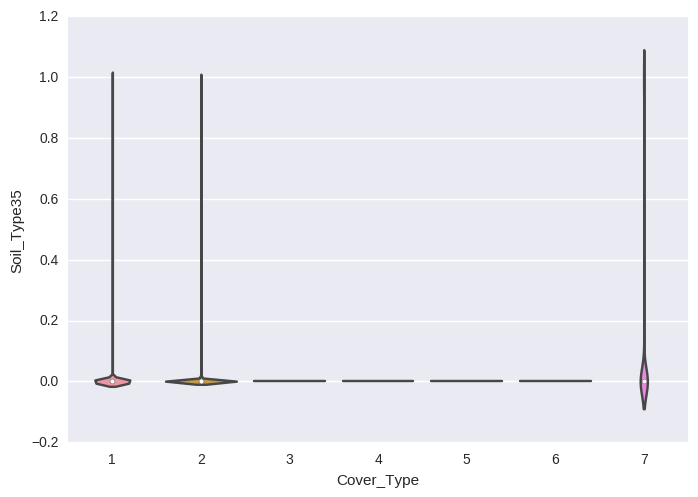

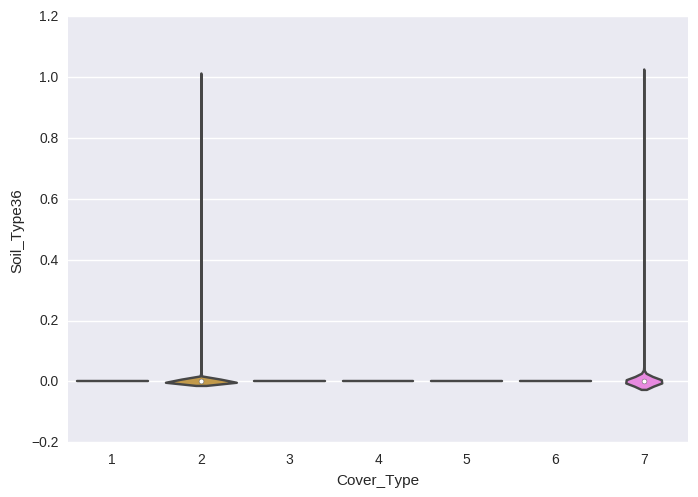

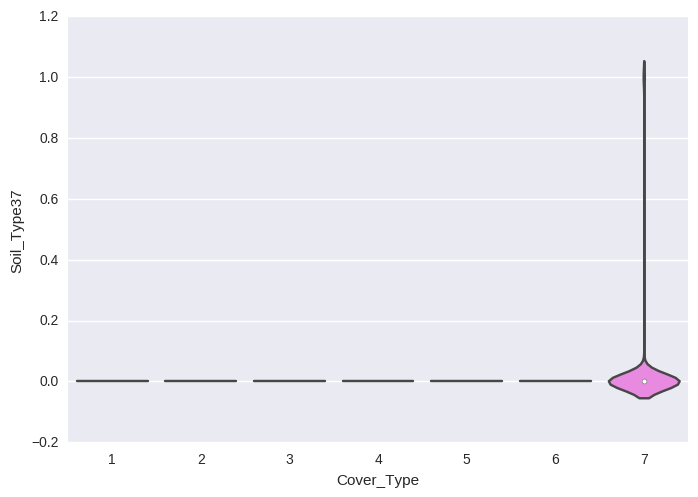

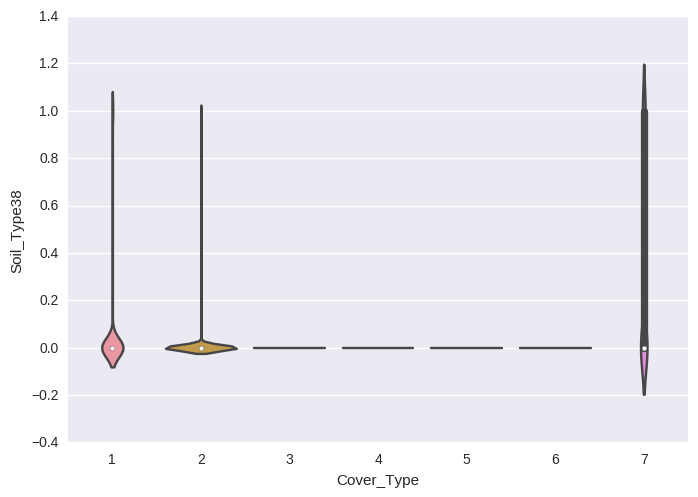

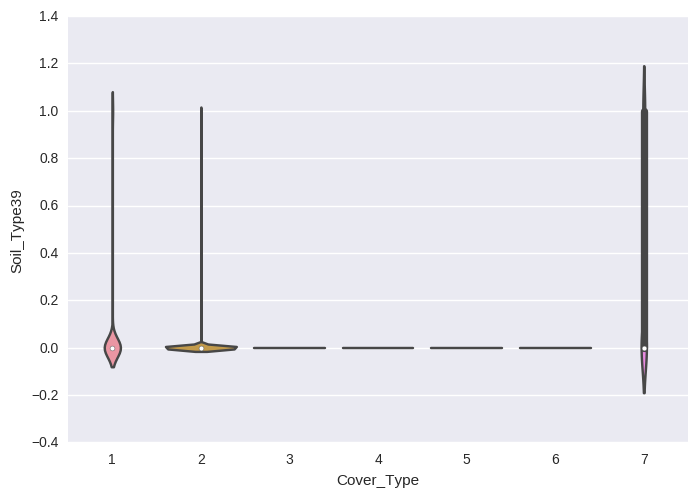

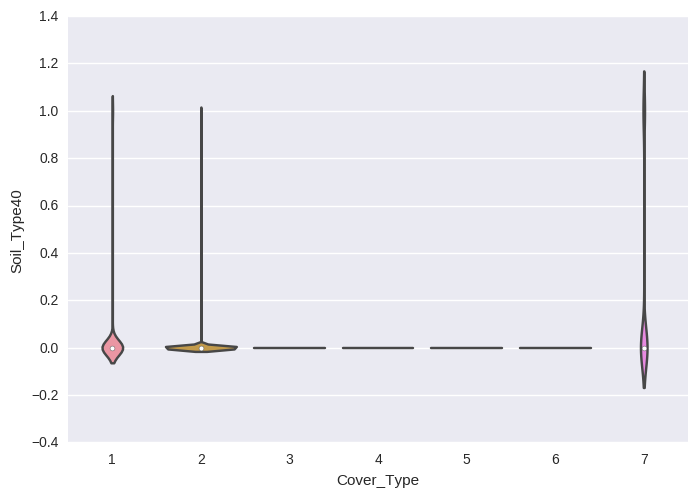

In [9]:
# We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes 
cols = dataset.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=dataset,x=x,y=y[i])  
    plt.show()

#Elevation is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute
#Aspect contains a couple of normal distribution for several classes
#Horizontal distance to road and hydrology have similar distribution
#Hillshade 9am and 12pm display left skew
#Hillshade 3pm is normal
#Lots of 0s in vertical distance to hydrology
#Wilderness_Area3 gives no class distinction. As values are not present, others gives some scope to distinguish
#Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

## Data Visualization
* Grouping of One hot encoded attributes

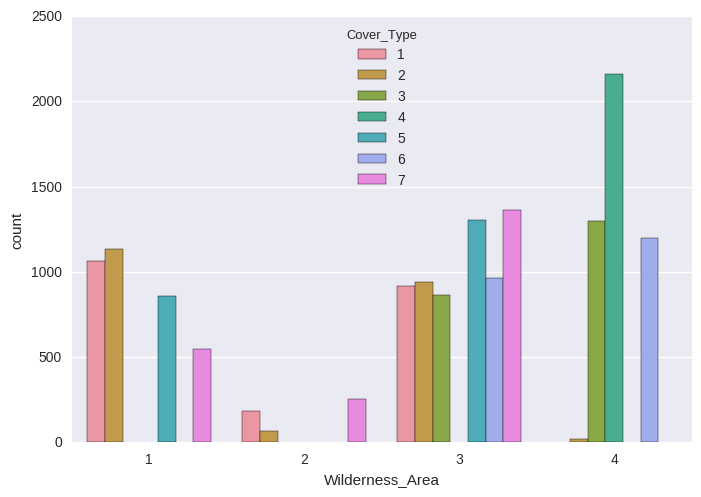

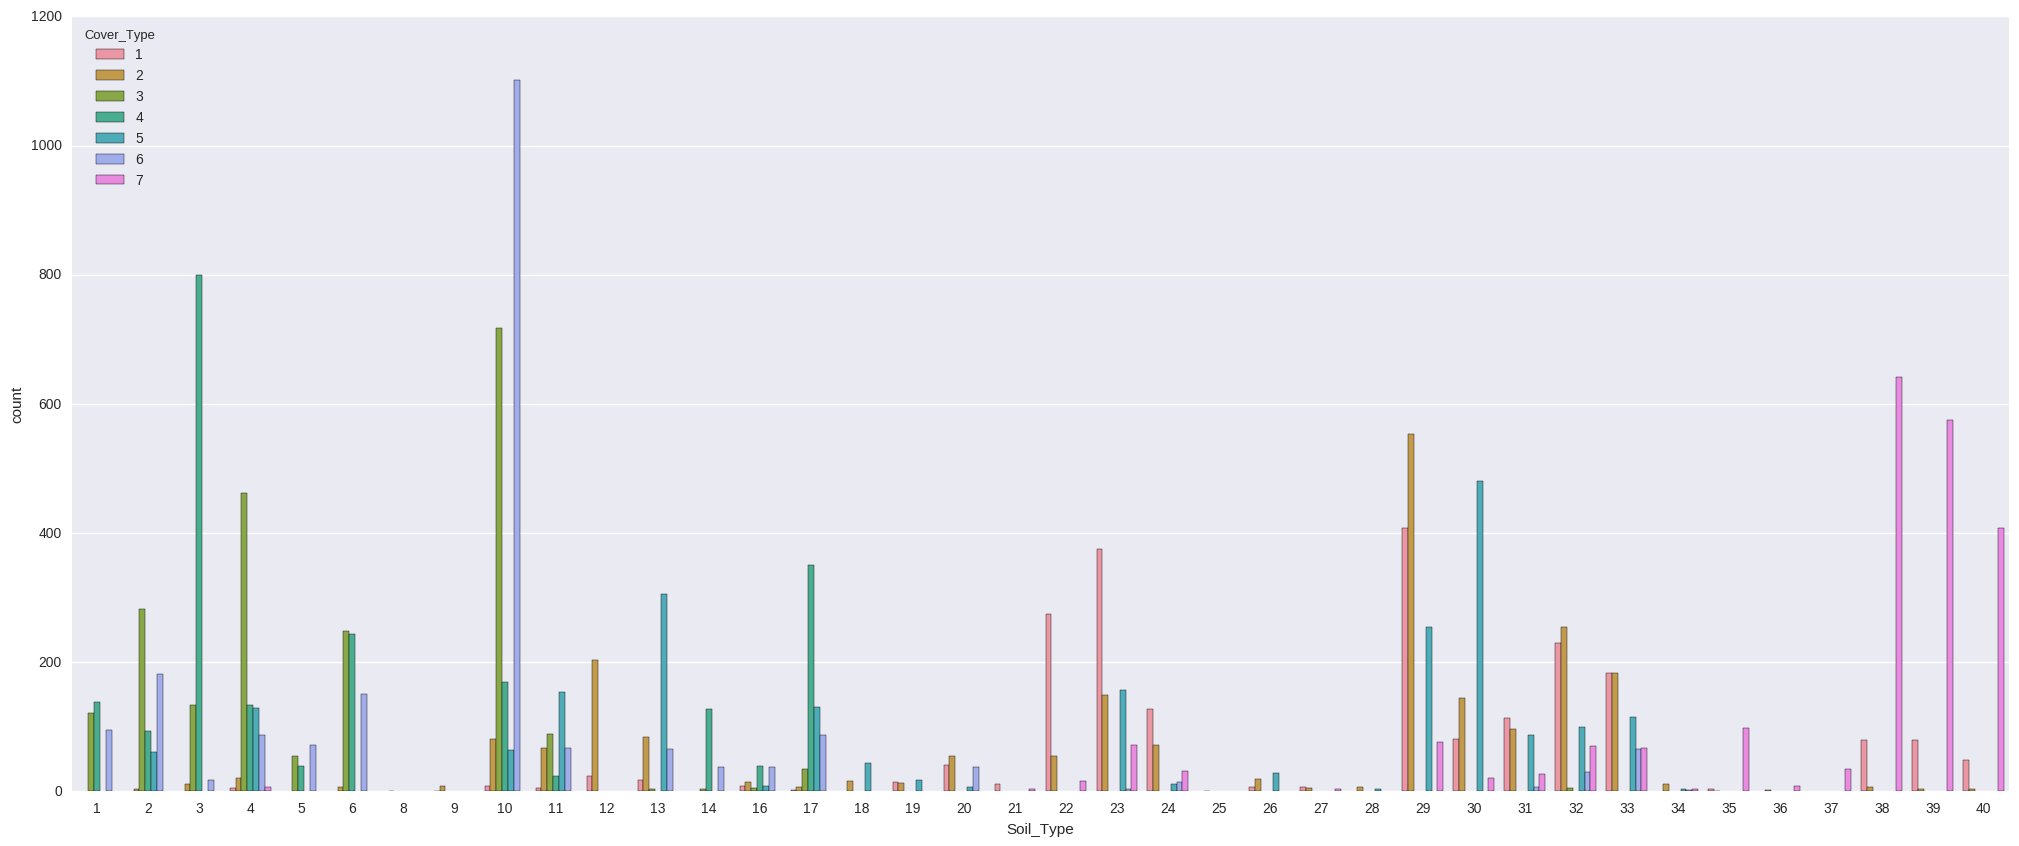

In [10]:
# Group one-hot encoded variables of a category into one single variable

#names of all the columns
cols = dataset.columns

#number of rows=r , number of columns=c
r,c = dataset.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pandas.DataFrame(index=numpy.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (dataset.iloc[i,j] == 1):
            w=j-9  #category class
            
            break
        
    # Category2 range        
    for k in range(14,54):
        if (dataset.iloc[i,k] == 1):
            s=k-13 #category class
            break
        
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,dataset.iloc[i,c-1]]
data

#Plot for Category1    
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

#(right-click and open the image in a new window for larger size)
#WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction
#WildernessArea_3 has not much class distinction
#SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high



## Data Cleaning
* Remove unnecessary columns

In [11]:
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in dataset.columns:
    if dataset[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
dataset.drop(rem,axis=1,inplace=True)

print(rem)

#Following columns are dropped

['Soil_Type7', 'Soil_Type15']


## Data Preparation
* Original
* Delete rows or impute values in case of missing
* StandardScaler
* MinMaxScaler
* Normalizer

In [12]:
#get the number of rows and columns
r, c = dataset.shape

#get the list of columns
cols = dataset.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []

#Extract only the values
array = dataset.values

#Y is the target column, X has the rest
X = array[:,0:(c-1)]
Y = array[:,(c-1)]

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

#Import libraries for data transformations
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])
print X_all
#point where categorical data begins
size=10

#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Impute
#Imputer is not used as no data is missing

#List of transformations
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)
trans_list

[['Orig', 'All', array([[2968,   64,   22, ...,    0,    0,    0],
       [2356,   69,   22, ...,    0,    0,    0],
       [2533,   54,    6, ...,    0,    0,    0],
       ..., 
       [3515,  158,   27, ...,    0,    0,    0],
       [2575,   80,   35, ...,    0,    0,    0],
       [2738,  304,    9, ...,    0,    0,    0]]), array([[2220,   18,   12, ...,    0,    0,    0],
       [2139,  119,   10, ...,    0,    0,    0],
       [2292,  109,   26, ...,    0,    0,    0],
       ..., 
       [2396,  102,   13, ...,    0,    0,    0],
       [2372,   76,   19, ...,    0,    0,    0],
       [2354,  313,   23, ...,    0,    0,    0]]), 1.0, Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_

/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarni

['Orig', 'StdSca', 'MinMax', 'Norm']

## Feature selection
* ExtraTreesClassifier
* GradientBoostingClassifier
* RandomForestClassifier
* XGBoostClassifier

In [13]:
#Select top 75%,50%,25%
ratio_list = [0.75,0.50,0.25]

In [14]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Import the libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Add ExtraTreeClassifiers to the list
n = 'ExTree'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,ExtraTreesClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])      

#Add GradientBoostingClassifiers to the list 
n = 'GraBst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,GradientBoostingClassifier(n_estimators=c-1,max_features=val,random_state=seed)])   

#Add RandomForestClassifiers to the list 
n = 'RndFst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RandomForestClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])   

#Add XGBClassifier to the list 
n = 'XGB'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,XGBClassifier(n_estimators=c-1,seed=seed)])   
        
#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.feature_importances_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    

#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

ImportError: No module named xgboost

## Feature selection
* RFE

In [ ]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Add RFE to the list 
model = LogisticRegression(random_state=seed,n_jobs=-1)
n = 'RFE'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RFE(model,val*(c-1))])   
        
#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.ranking_)):
            joined.append([i,cols[i],pred])
        #Sort in ascending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for i, col, j in joined_sorted:
            #Store the rank
            rank_list.append([i,j-1])
            #Store selected columns in cols_list and indexes in i_cols_list
            if((j-1) < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    

#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

#Feature Selection
* SelectPercentile

In [ ]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for SelectPercentile    
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif        

n = 'SelK'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,SelectPercentile(score_func=f_classif,percentile=val*100)])   

#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.scores_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

#Feature Selection
Ranking summary

In [ ]:
rank_df = pandas.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
_ = rank_df.boxplot(rot=90)
#Below plot summarizes the rankings according to the standard feature selection techniques
#Top ranked attributes are ... first 10 attributes, Wilderness_Area1,4 ...Soil_Type 3,4,10,38-40

#Feature Selection
Rank features based on median

In [ ]:
rank_df = pandas.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
med = rank_df.median()
print(med)
#Write medians to output file for exploratory study on ML algorithms
with open("median.csv", "w") as subfile:
       subfile.write("Column,Median\n")
       subfile.write(med.to_string())

##Part 2 of the Notebook:
https://www.kaggle.com/sharmasanthosh/forest-cover-type-prediction/exploratory-study-of-ml-algorithms